<span style="color:red">Jan Izquierdo and Carmen Samedi</span>

# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 4

# Positive feedback


---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aula ESCI***.

Remember to label the axes in all the plots.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

The objective of this practical is to explore the behaviour of a system with a positive feedback motif. In particular, we will use numerical integration of an ordinary differential equation model to analyze the behavior of a phosphorylation/dephosphorylation cycle as the kinase concentration (acting as input signal) is cycled from a low to a high level and back.

Consider the phosphorylation/dephosphorylation cycle shown in the figure
below, in which phosphorylation is induced by both a stimulus signal
$S$ and by the phosphorylated protein itself, in the form of a positive
feedback loop. Assuming that the latter process is cooperative, the
model of this system can be written as:

<img style="margin: 20px; float: right" src="http://dsb.upf.edu/biocomp/figs/irrevers.png" width="15%"/>

$$\frac{dA_p}{dt}=k_p SA+\beta\frac{A_p^n}{K^n+A_p^n}-k_dA_p$$

where
$k_p$ is the activation (phosphorylation) rate, $k_d$ is the
inactivation (dephosphorylation) rate, $A$ is the concentration of the
unphosphorylated protein, and $A_p$ is the concentration of the
phosphorylated protein.
We will assume that the total protein concentration, $A_T=A+A_p$, is
constant. We will consider the following parameter values: $K=50$,
$A_T=100$, $k_d=0.11$, $\beta=10$, $k_p=0.1$, and $n=4$.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

First, integrate numerically, up to $t=100$, the differential equation
above for a low (basal) stimulus level, such as $S=0.01$, assuming
that initially the protein is completely unphosphorylated.

Text(0.5, 0.98, 'Phosphorylation and dephosphorylation cycle')

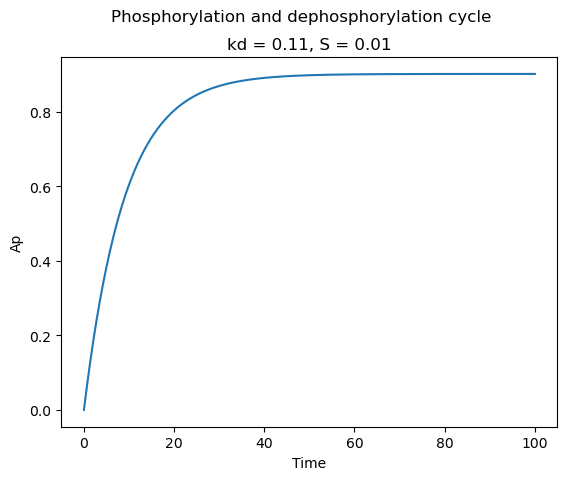

In [2]:
K=50
At=100
Kd=0.11
B=10
Kp=0.1
n=4

def phosphorylation(Ap, t):
    S=0.01
    A=At-Ap
    dAp_dt = Kp*S*A + B*( (Ap**n) / (K**n + Ap**n)) - Kd*Ap

    return dAp_dt

t=np.linspace(0, 100, 1000)

Ap0=0
Ap_1=odeint(phosphorylation, Ap0, t)

plt.plot(t, Ap_1)
plt.xlabel("Time")
plt.ylabel("Ap")
plt.title("kd = 0.11, S = 0.01")
plt.suptitle('Phosphorylation and dephosphorylation cycle')

#phosphorylation cycle = Kp*S*A + beta*(Ap^n / K^n + Ap^n) - Kd* Ap

---

<span style="color:red">We can see the gradual increase from 0 and eventually reaching the steady state. </span>

---

Next, starting from the stationary situation obtained in the previous
case, study the effect of suddenly applying a large stimulus signal,
so that $S$ suddenly jumps to a high level, such as $S=1$.

Text(0.5, 0.98, 'Phosphorylation and dephosphorylation cycle')

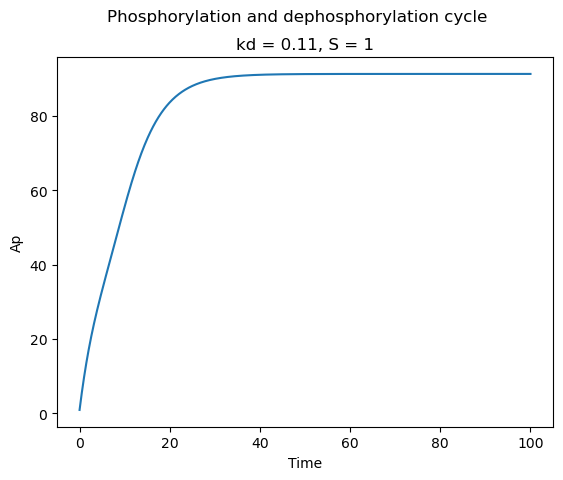

In [3]:
def phosphorylation_S1(Ap, t):
    S = 1
    A=At-Ap
    dAp_dt = Kp*S*A + B*( (Ap**n) / (K**n + Ap**n)) - Kd*Ap

    return dAp_dt

time = np.linspace(0, 100, 1000)

Ap0 = 0.9

Ap_2 = odeint(phosphorylation_S1, Ap0, time)

plt.plot(time, Ap_2)
plt.xlabel('Time')
plt.ylabel('Ap')
plt.title("kd = 0.11, S = 1")
plt.suptitle('Phosphorylation and dephosphorylation cycle')


---

<span style="color:red"> We can see changing S, slightly modifies the curve but overall the reaction is the same. It gradually increases and reaches a steady state.  </span>

---

Next, starting from the latest stationary situation, integrate
the equations again for $S=0.01$. Does the system go back to its
original state?

(0.0, 91.3098351067314)

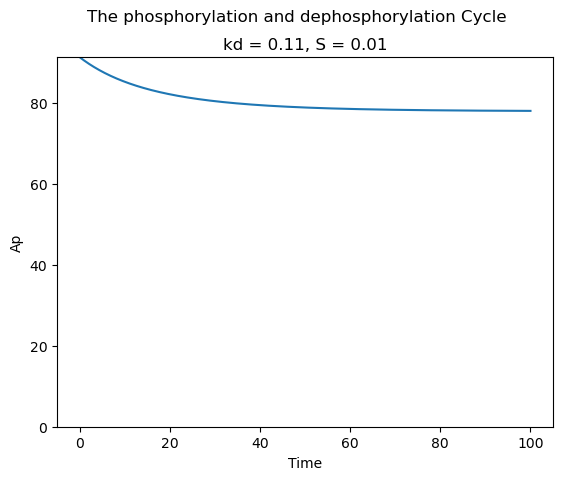

In [4]:
time = np.linspace(0, 100, 1000)

Ap0 = Ap_2[-1]

Ap_3 = odeint(phosphorylation, Ap0, time) #phosphorylation is the function with S=0.01

plt.plot(time, Ap_3)
plt.xlabel('Time')
plt.ylabel('Ap')
plt.suptitle('The phosphorylation and dephosphorylation Cycle')
plt.title('kd = 0.11, S = 0.01')
plt.ylim(0, Ap0)

---

<span style="color:red">We can observe in the plot above, although we start with a very high Ap, the system is able to go back to the steady state but not to the original state. By modifying these parameters we modify the start of the cycle.</span>

---

Finally, continue further to $S=0$, thus eliminating the stimulus
completely. Does the system now go back to its original
state? 

(0.0, 88.02878361501983)

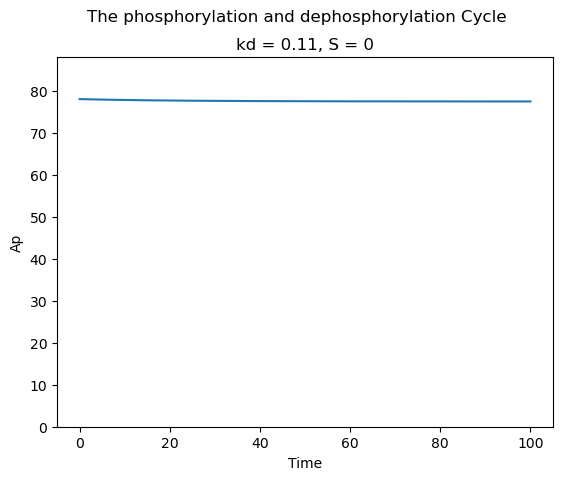

In [5]:
def phosphorylation_S0(Ap, t):
    S = 0.0
    A=At-Ap
    dAp_dt = Kp*S*A + B*( (Ap**n) / (K**n + Ap**n)) - Kd*Ap

    return dAp_dt

time = np.linspace(0, 100, 1000)

Ap0 = Ap_3[-1]

Ap_4 = odeint(phosphorylation_S0, Ap0, time)

plt.plot(time, Ap_4)
plt.xlabel('Time')
plt.ylabel('Ap')
plt.suptitle('The phosphorylation and dephosphorylation Cycle')
plt.title('kd = 0.11, S = 0')
plt.ylim(0, Ap0+10)

---

<span style="color:red">These results make sense, if there is no more stimulus there is no more production. Since there is no more stimulus the cycle is broken and everything is equal to 0 so it can not go back to its original state. </span>

---

Now we will manually compute a bifurcation diagram of the system. 
In order to do this, choose a range of S values from 0 to 1. Start for S=0 considering that the protein is unphosphorylated at the beginning. Then, for each S value do a simulation starting each integration at the previous steady state, and save the new steady state value. Plot the results in a graph where the x axis is S, and the y axis is the steady state reached (from each simulation). Then do the same but in reverse order (starting from high S) and plot the results in a different color.

[0.0, 0.9099142469733066, 1.8035654056159174, 2.6816862738825353, 3.545164630676475, 4.394995113342643, 5.2322547468669365, 6.0580859851485, 6.873686009424641, 7.680301816159617, 8.479230193485977, 9.271822680476701, 10.059495075109732, 10.843742074085155, 11.626157680827493, 12.408462582469067, 13.192540610487136, 13.980487302788061, 14.77467537296891, 15.57784444032822, 16.393226968139736, 17.224729764646852, 18.077204586101278, 18.956867864388784, 19.871984021287997, 20.834047028208428, 21.859987472528907, 22.976740034415677, 24.232151642123597, 25.727325296151022, 27.755916986059372, 32.27945742206148, 85.07013209414626, 85.81308982591626, 85.95458369858213, 86.09286266530798, 86.22807588152621, 86.36033845209134, 86.48975910033205, 86.6164406329246, 86.74048037713062, 86.86197057396524, 86.98099873576304, 87.0976479728906, 87.21199729119971, 87.3241218618036, 87.43409327250814, 87.54197975443545, 87.64784640015283, 87.75175534997075, 87.85376597274427, 87.95393503178217, 88.052316

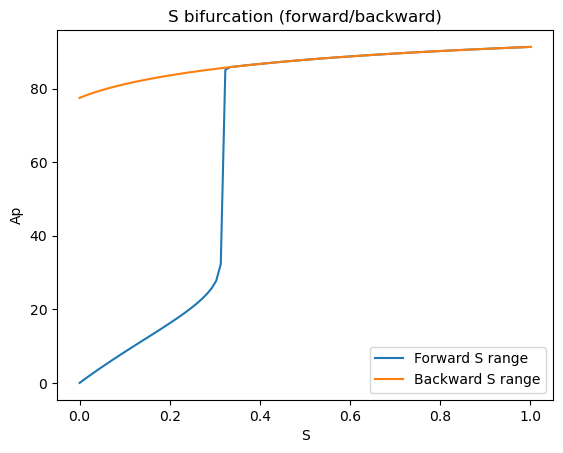

In [6]:
def phosphorylation_Sno(Ap, t): #No S defined, so that it can be defined outside the function
    A=At-Ap
    dAp_dt = Kp*S*A + B*( (Ap**n) / (K**n + Ap**n)) - Kd*Ap

    return dAp_dt

time = np.linspace(0, 100, 1000)
S_list_f=np.linspace(0, 1, 100)
Ap_list_f=[0] #To begin with Ap=0


for S in S_list_f:
    Ap0=Ap_list_f[-1] #Current Ap0 will be last Ap state
    Ap_c= odeint(phosphorylation_Sno, Ap0, time)
    Ap_list_f.append(Ap_c[-1][0]) #in Ap_c each number is inside its own list, so last number is [-1], and then get it as a sole float [0]
Ap_list_f.pop(0) #remove the intially defined 0

print(Ap_list_f)
###


#Reverse the S list
S_list_b=list(S_list_f) #turn the array into a list first
S_list_b.reverse()
Ap_list_b=[0] #to begin with Ap0


for S in S_list_b:
    Ap0=Ap_list_b[-1] #Current Ap0 will be last Ap state
    Ap_c= odeint(phosphorylation_Sno, Ap0, time)
    Ap_list_b.append(Ap_c[-1][0]) #[[0],[0.1]], etc, so Ap_c[-1][0] is needed to extract
Ap_list_b.pop(0) #remove the intially defined 0



plt.plot(S_list_f, Ap_list_f, label="Forward S range")
plt.plot(S_list_b, Ap_list_b, label="Backward S range")
plt.xlabel('S')
plt.ylabel('Ap')
plt.title('S bifurcation (forward/backward)')
plt.legend()


---

<span style="color:red">The backward range presents a much more constant increase while the forward experiences a peak and stabilizes again at the same Ap values that the backward ends in.</span>

---

Finally, repeat the analysis above for $k_d=0.13$. First, integrate for fixed values of $S$ (increasing first from $S=0.01$ to $S=1$, and then decreasing back to $S=0.01$ and $S=0$), starting in each case from the previous steady state. Comment on the differences with respect to the case $k_d=0.11$.

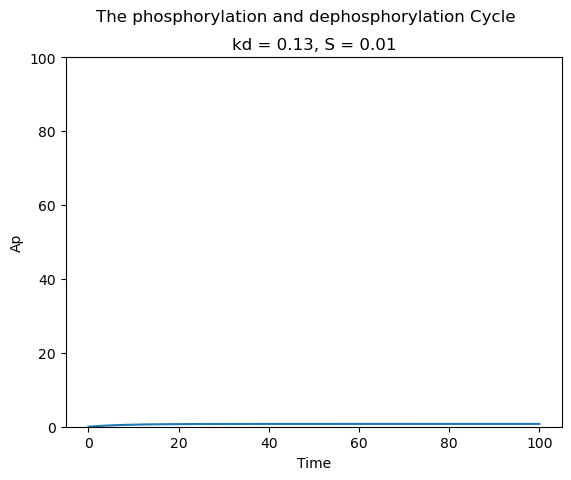

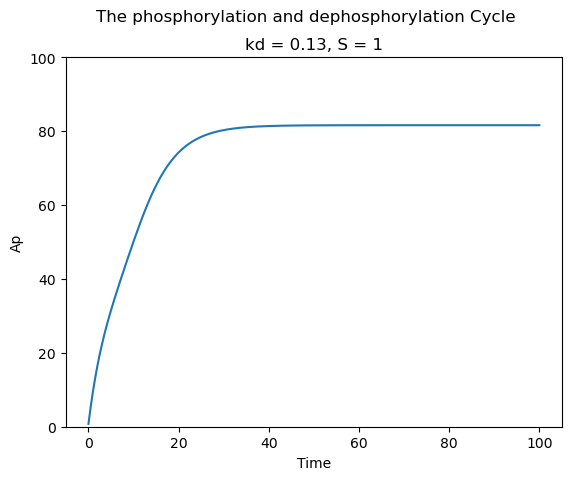

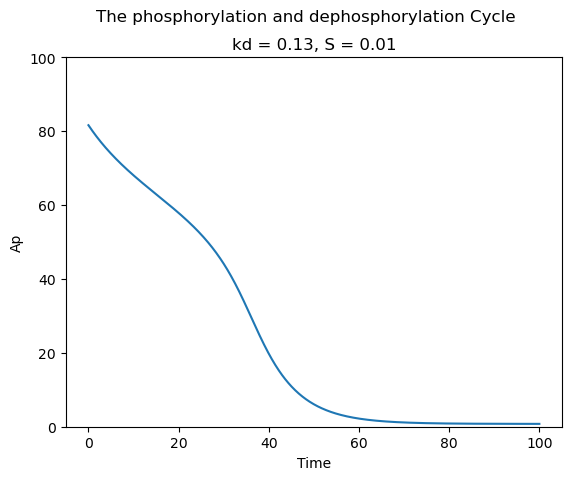

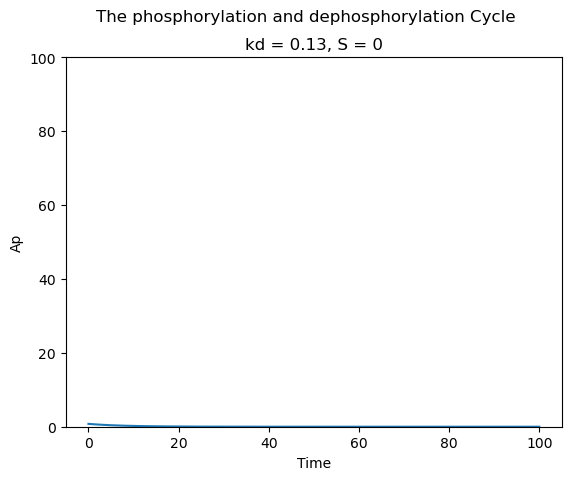

In [9]:
Kd= 0.13
time = np.linspace(0, 100, 1000)

Ap0 = 0
S=0.01
Ap_1 = odeint(phosphorylation_Sno, Ap0, time) 

plt.plot(time, Ap_1)
plt.xlabel('Time')
plt.ylabel('Ap')
plt.suptitle('The phosphorylation and dephosphorylation Cycle')
plt.title('kd = 0.13, S = 0.01')
plt.ylim(0, 100)
plt.show()

S=1
Ap_2 = odeint(phosphorylation_Sno, Ap_1[-1], time) 
plt.plot(time, Ap_2)
plt.xlabel('Time')
plt.ylabel('Ap')
plt.suptitle('The phosphorylation and dephosphorylation Cycle')
plt.title('kd = 0.13, S = 1')
plt.ylim(0, 100)
plt.show()

S=0.01
Ap_3 = odeint(phosphorylation_Sno, Ap_2[-1], time) 
plt.plot(time, Ap_3)
plt.xlabel('Time')
plt.ylabel('Ap')
plt.suptitle('The phosphorylation and dephosphorylation Cycle')
plt.title('kd = 0.13, S = 0.01')
plt.ylim(0, 100)
plt.show()

S=0
Ap_4 = odeint(phosphorylation_Sno, Ap_3[-1], time) 
plt.plot(time, Ap_4)
plt.xlabel('Time')
plt.ylabel('Ap')
plt.suptitle('The phosphorylation and dephosphorylation Cycle')
plt.title('kd = 0.13, S = 0')
plt.ylim(0, 100)
plt.show()


---

<span style="color:red"> With respect to the first plots we did, Kd=0.11, these four plots differ in form. If the dephosphorylation constant increases and the phosphorylation constant stays the same, then the rate at which our proteins are deactivated is faster than the rate at which they are activated, regardless of the stimulus. We can see that with a lower level for which it stabilises and sharper drops when changing the stimulus due to the faster dephosphorylation.    </span>

---

Finally, calculate numerically the bifurcation diagram for $k_d=0.13$ and compare it again with the case $k_d=0.11$.

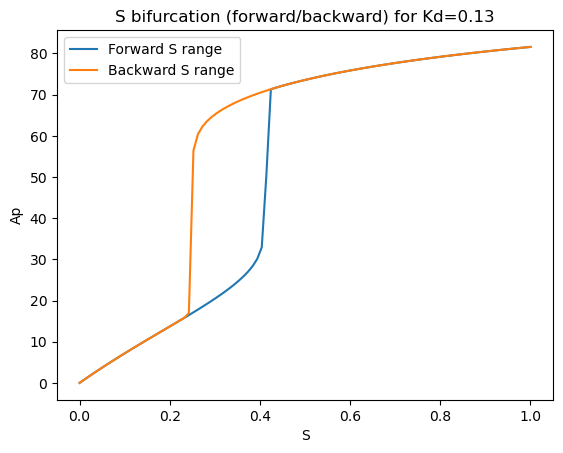

In [10]:
time = np.linspace(0, 100, 1000)
S_list_f13=np.linspace(0, 1, 100)
Ap_list_f13=[0] #To begin with Ap=0


for S in S_list_f13:
    Ap0=Ap_list_f13[-1] #Current Ap0 will be last Ap state
    Ap_c= odeint(phosphorylation_Sno, Ap0, time)
    Ap_list_f13.append(Ap_c[-1][0]) #in Ap_c each number is inside its own list, so last number is [-1], and then get it as a sole float [0]
Ap_list_f13.pop(0) #remove the intially defined 0


###


#Reverse the S list
time = np.linspace(0, 100, 1000)
S_list_b13=list(S_list_f13) #turn the array into a list first
S_list_b13.reverse()
Ap_list_b13=[0] #to begin with Ap0


for S in S_list_b13:
    Ap0=Ap_list_b13[-1] #Current Ap0 will be last Ap state
    Ap_c= odeint(phosphorylation_Sno, Ap0, time)
    Ap_list_b13.append(Ap_c[-1][0]) #[[0],[0.1]], etc, so Ap_c[-1][0] is needed to extract
Ap_list_b13.pop(0) #remove the intially defined 0



plt.plot(S_list_f13, Ap_list_f13, label="Forward S range")
plt.plot(S_list_b13, Ap_list_b13, label="Backward S range")
plt.xlabel('S')
plt.ylabel('Ap')
plt.title('S bifurcation (forward/backward) for Kd=0.13')
plt.legend()

---

<span style="color:red">When comparing this bifurcation graph with the one previously made, we can see the biggest difference is in the backward range.
Kd seems to be too small in the first bifurcation and this time is able to restabilise to the same state. </span>

---